ML Project

# **1 Data Preprocessing and Exploration**

## 1.1 **Data Cleaning**

### **1.1.1 Pizza Ingredients**

In [3]:
# pip install openpyxl openpyxl library, which pandas uses for handling Excel files, is not installed in your virtual environment.
import pandas as pd
# Load your DataFrame from an Excel file
Pizza_ingredients_df = pd.read_excel("Pizza_ingredients.xlsx")
# installed pip install openpyxl

Understanding the Data:
    On average, a Domino's store in US sells about 400 pizzas per day. Domino's US sells over 4 million pizzas per month.

Dataset Overview:
    Pizza_Sale.csv with 48,620 rows and 12 columns.
    Pizza_Ingredients.csv with 518 rows and 4 columns.

In [4]:
Pizza_ingredients_df.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [5]:
Pizza_ingredients_df.shape

(518, 4)

In [6]:
Pizza_ingredients_df.describe()

,Items_Qty_In_Grams
count,514.000000
mean,30.564202
std,30.351623
min,5.000000
25%,10.000000
50%,20.000000
75%,40.000000
max,200.000000


In [7]:
Pizza_ingredients_df.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [8]:
Pizza_ingredients_missing_value_rows = Pizza_ingredients_df[Pizza_ingredients_df.isna().any(axis=1)]
Pizza_ingredients_missing_value_rows

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
24,brie_carre_s,The Brie Carre Pizza,Caramelized Onions,NaN
149,hawaiian_l,The Hawaiian Pizza,Sliced Ham,NaN
152,hawaiian_m,The Hawaiian Pizza,Sliced Ham,NaN
155,hawaiian_s,The Hawaiian Pizza,Sliced Ham,NaN


In [9]:
#fill the null values
Pizza_ingredients_df.loc[(Pizza_ingredients_df['pizza_ingredients'] == 'Caramelized Onions') & (Pizza_ingredients_df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0
Pizza_ingredients_df.loc[(Pizza_ingredients_df['pizza_name_id'] == 'hawaiian_l') & (Pizza_ingredients_df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 60.0
Pizza_ingredients_df.loc[(Pizza_ingredients_df['pizza_name_id'] == 'hawaiian_m') & (Pizza_ingredients_df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 40.0
Pizza_ingredients_df.loc[(Pizza_ingredients_df['pizza_name_id'] == 'hawaiian_s') & (Pizza_ingredients_df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0

In [10]:
Pizza_ingredients_df.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64

In [11]:
Pizza_ingredients_df.duplicated().sum()

np.int64(0)

In [12]:
unique_count = Pizza_ingredients_df.nunique()
unique_count

pizza_name_id         91
pizza_name            32
pizza_ingredients     64
Items_Qty_In_Grams    17
dtype: int64

In [13]:
Pizza_ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [14]:
Pizza_ingredients_df.Items_Qty_In_Grams = Pizza_ingredients_df.Items_Qty_In_Grams.astype(int)

In [15]:
Pizza_ingredients_df.pizza_ingredients = Pizza_ingredients_df.pizza_ingredients.replace({'Barbecued Chicken': "Barbecue Chicken", '?duja Salami': "nduja Salami"})

### **1.1.2 Pizza_Sale**

In [16]:
Pizza_Sale_df = pd.read_excel("Pizza_Sale.xlsx")

In [17]:
Pizza_Sale_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [18]:
Pizza_Sale_df.shape

(48620, 12)

In [19]:
Pizza_Sale_df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48613.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821494
std,14035.529381,6180.119770,0.143077,3.621789,4.437520
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [20]:
# Display count of unique values in each column
unique_count = Pizza_Sale_df.nunique()
unique_count

pizza_id             48620
order_id             21350
pizza_name_id           91
quantity                 4
order_date             358
order_time           16382
unit_price              25
total_price             56
pizza_size               5
pizza_category           4
pizza_ingredients       32
pizza_name              32
dtype: int64

In [21]:
Pizza_Sale_df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [22]:
Pizza_Sale_df.duplicated().sum()

np.int64(0)

In [23]:
# Fill `total_price` where it is null with `quantity * unit_price`
Pizza_Sale_df['total_price'].fillna(Pizza_Sale_df['unit_price'] * Pizza_Sale_df['quantity'], inplace=True)

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\303234929.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Pizza_Sale_df['total_price'].fillna(Pizza_Sale_df['unit_price'] * Pizza_Sale_df['quantity'], inplace=True)


In [24]:
# <!-- Fill pizza_category where it is null with Veggie, Classic, Chicken and Supreme -->
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Five Cheese Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Mexicana Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Spinach Pesto Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Spinach and Feta Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Veggie'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Greek Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Napolitana Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Pepperoni Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Hawaiian Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Italian Capocollo Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Classic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Barbecue Chicken Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Chicken'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Chicken Alfredo Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Chicken'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Prosciutto and Arugula Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Brie Carre Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Pepper Salami Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Sicilian Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Spicy Italian Pizza') & (Pizza_Sale_df['pizza_category'].isnull()), 'pizza_category'] = 'Supreme'


In [25]:
# Fill null values in `pizza_name` based on `pizza_name_id`
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name_id'].isin(['pepperoni_l', 'pepperoni_s'])) & (Pizza_Sale_df['pizza_name'].isnull()), 'pizza_name'] = 'The Pepperoni Pizza'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name_id'] == 'hawaiian_s') & (Pizza_Sale_df['pizza_name'].isnull()), 'pizza_name'] = 'The Hawaiian Pizza'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name_id'] == 'big_meat_s') & (Pizza_Sale_df['pizza_name'].isnull()), 'pizza_name'] = 'The Big Meat Pizza'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name_id'] == 'spicy_ital_m') & (Pizza_Sale_df['pizza_name'].isnull()), 'pizza_name'] = 'The Spicy Italian Pizza'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name_id'] == 'sicilian_s') & (Pizza_Sale_df['pizza_name'].isnull()), 'pizza_name'] = 'The Sicilian Pizza'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name_id'] == 'mexicana_l') & (Pizza_Sale_df['pizza_name'].isnull()), 'pizza_name'] = 'The Mexicana Pizza'

In [26]:
# Filling null values in 'pizza_ingredients' based on 'pizza_name'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Five Cheese Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Four Cheese Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Green Garden Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Hawaiian Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Sliced Ham, Pineapple, Mozzarella Cheese'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The California Chicken Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Southwest Chicken Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Chicken Alfredo Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Spinach and Feta Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Spinach, Mushrooms, Red Onions, Feta Cheese, Garlic'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Prosciutto and Arugula Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Prosciutto di San Daniele, Arugula, Mozzarella Cheese'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Pepperoni, Mushroom, and Peppers Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Pepperoni, Mushrooms, Green Peppers'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Italian Vegetables Pizza') & (Pizza_Sale_df['pizza_ingredients'].isnull()), 'pizza_ingredients'] = 'Eggplant, Artichokes, Tomatoes, Zucchini, Red Peppers, Garlic, Pesto Sauce'


In [27]:
# Filling null values in 'pizza_name_id' based on 'pizza_name'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Five Cheese Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'five_cheese_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Soppressata Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'soppressata_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Greek Pizza') & (Pizza_Sale_df['pizza_size'] == 'S') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'the_greek_s'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Four Cheese Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'four_cheese_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Napolitana Pizza') & (Pizza_Sale_df['pizza_size'] == 'S') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'napolitana_s'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Thai Chicken Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'thai_ckn_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Green Garden Pizza') & (Pizza_Sale_df['pizza_size'] == 'S') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'green_garden_s'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Spinach Supreme Pizza') & (Pizza_Sale_df['pizza_size'] == 'S') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'spinach_supr_s'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Pepperoni Pizza') & (Pizza_Sale_df['pizza_size'] == 'S') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'pepperoni_s'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Barbecue Chicken Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'bbq_ckn_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Hawaiian Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'hawaiian_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Italian Supreme Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'ital_supr_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The California Chicken Pizza') & (Pizza_Sale_df['pizza_size'] == 'L') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'cali_ckn_l'
Pizza_Sale_df.loc[(Pizza_Sale_df['pizza_name'] == 'The Pepper Salami Pizza') & (Pizza_Sale_df['pizza_size'] == 'M') & (Pizza_Sale_df['pizza_name_id'].isnull()), 'pizza_name_id'] = 'peppr_salami_m'

In [28]:
Pizza_Sale_df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [29]:
Pizza_Sale_df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

In [30]:
Pizza_Sale_df['pizza_name_id'].value_counts()

pizza_name_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

In [31]:
Pizza_Sale_df.pizza_ingredients = Pizza_Sale_df.pizza_ingredients.replace({
    'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce': "Barbecue Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",
    'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese': "Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",
    '?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic': "nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic"})

In [32]:
Pizza_Sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [33]:
Pizza_Sale_df.shape

(48620, 12)

In [34]:
Pizza_Sale_df.duplicated().sum()

np.int64(0)

In [35]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y', '%Y-%m-%d %H:%M:%S'): # %Y-%m-%d %H:%M:%S
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

Pizza_Sale_df['order_date'] = Pizza_Sale_df['order_date'].apply(parse_dates)

# Function to convert time from 24-hour to 12-hour format "order_time" column.
from datetime import datetime

def convert_to_12_hour_format(time_obj):  # Convert the time object to a string in the format '%H:%M:%S' if it's not already a string
    time_string = time_obj.strftime('%H:%M:%S')  # Parse the time string and convert to 12-hour format with AM/PM
    return datetime.strptime(time_string, '%H:%M:%S').strftime('%I:%M:%S %p')

# Convert the 'order_time' column to 12-hour format
Pizza_Sale_df['order_time'] = Pizza_Sale_df['order_time'].apply(convert_to_12_hour_format)

# Display the updated DataFrame to verify changes
Pizza_Sale_df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40 AM,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40 AM,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,09:23:10 PM,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,09:23:10 PM,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,09:23:10 PM,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,10:09:54 PM,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## **1.2 Mergeing 2 data frame**

In [36]:
merged_df = pd.merge(Pizza_Sale_df, Pizza_ingredients_df, left_on=['pizza_name_id', 'pizza_name'], right_on=['pizza_name_id', 'pizza_name'], how='inner')
# merged_df_1 = pd.merge(Cleaned_Pizza_Sale_df, Cleaned_Pizza_ingredients_df, left_on=['pizza_name_id', 'pizza_name'], right_on=['pizza_name_id', 'pizza_name'], how='inner')

In [37]:
# Display the merged DataFrame
merged_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients_x,pizza_name,pizza_ingredients_y,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Sliced Ham,40
1,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Pineapple,30
2,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Mozzarella Cheese,20
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Pepperoni,40
4,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Mushrooms,40


In [38]:
merged_df.shape

(267576, 14)

In [39]:
merged_df.isnull().sum()

pizza_id               0
order_id               0
pizza_name_id          0
quantity               0
order_date             0
order_time             0
unit_price             0
total_price            0
pizza_size             0
pizza_category         0
pizza_ingredients_x    0
pizza_name             0
pizza_ingredients_y    0
Items_Qty_In_Grams     0
dtype: int64

In [40]:
merged_df[['pizza_ingredients_x','pizza_ingredients_y']]

,pizza_ingredients_x,pizza_ingredients_y
0,"Sliced Ham, Pineapple, Mozzarella Cheese",Sliced Ham
1,"Sliced Ham, Pineapple, Mozzarella Cheese",Pineapple
2,"Sliced Ham, Pineapple, Mozzarella Cheese",Mozzarella Cheese
3,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Pepperoni
4,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Mushrooms
...,...,...
267571,"Barbecue Chicken, Red Peppers, Green Peppers, ...",Red Peppers
267572,"Barbecue Chicken, Red Peppers, Green Peppers, ...",Green Peppers
267573,"Barbecue Chicken, Red Peppers, Green Peppers, ...",Tomatoes
267574,"Barbecue Chicken, Red Peppers, Green Peppers, ...",Red Onions


In [41]:
merged_df.drop('pizza_ingredients_y', axis=1, inplace=True)

In [42]:
merged_df = merged_df.rename(columns={"pizza_ingredients_x": "pizza_ingredients"})
merged_df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,40
1,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30
2,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40
4,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267571,48620,21350,bbq_ckn_s,1,2015-12-31,11:02:05 PM,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,5
267572,48620,21350,bbq_ckn_s,1,2015-12-31,11:02:05 PM,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,20
267573,48620,21350,bbq_ckn_s,1,2015-12-31,11:02:05 PM,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,10
267574,48620,21350,bbq_ckn_s,1,2015-12-31,11:02:05 PM,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,20


In [43]:
merged_df.duplicated().sum()

np.int64(80205)

In [44]:
merged_df1 = merged_df.copy()

In [45]:
# Droping duplicate rows from the dataset
Dominos_pizza = merged_df.drop_duplicates()

Dominos_pizza.duplicated().sum()

np.int64(0)

## **1.3 Find the Mean, Median, Mode, SD and Var & Remove outliers**

In [46]:
#check the mean, median, mode, std and var 
#here I check numerical columns like continuous dataset 
stats = {'mean': [Dominos_pizza['unit_price'].mean(), Dominos_pizza['total_price'].mean(), Dominos_pizza['quantity'].mean()],
         'median': [Dominos_pizza['unit_price'].median(), Dominos_pizza['total_price'].median(), Dominos_pizza['quantity'].median()],
         'mode': [Dominos_pizza['unit_price'].mode()[0], Dominos_pizza['total_price'].mode()[0], Dominos_pizza['quantity'].mode()[0]],
         'std': [Dominos_pizza['unit_price'].std(), Dominos_pizza['total_price'].std(), Dominos_pizza['quantity'].std()],
         'var': [Dominos_pizza['unit_price'].var(), Dominos_pizza['total_price'].var(), Dominos_pizza['quantity'].var()]
        }
#view in df
compare = pd.DataFrame(stats, index = ['unit_price', 'total_price', 'quantity'])
compare
#here in total_price, mean is more than median i.e. right skewed distribution

,mean,median,mode,std,var
unit_price,16.914408,16.75,20.75,3.571439,12.755176
total_price,17.244915,16.75,20.75,4.419968,19.536117
quantity,1.019251,1.00,1.00,0.141575,0.020044


In [47]:
#removing outliers using IQR (INTERQUANTILE RANGE)
def remove_outliers(Dominos_pizza):
    for col in Dominos_pizza[['quantity', 'unit_price', 'total_price']]:
        Q1 = Dominos_pizza[col].quantile(0.15)
        Q3 = Dominos_pizza[col].quantile(0.85)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
        Dominos_pizza = Dominos_pizza[(Dominos_pizza[col] >= lower_bound) & (Dominos_pizza[col] <= upper_bound)]
        
    
    print("Data after removing outliers:\n", Dominos_pizza.describe())

    return Dominos_pizza

In [48]:
df = remove_outliers(Dominos_pizza)

Data after removing outliers:
             pizza_id       order_id  quantity                     order_date  \
count  183722.000000  183722.000000  183722.0                         183722   
mean    24311.794679   10701.946991       1.0  2015-06-28 21:30:52.063443712   
min         1.000000       1.000000       1.0            2015-01-01 00:00:00   
25%     12154.000000    5337.000000       1.0            2015-03-30 00:00:00   
50%     24271.500000   10664.000000       1.0            2015-06-28 00:00:00   
75%     36490.000000   16110.000000       1.0            2015-09-29 00:00:00   
max     48620.000000   21350.000000       1.0            2015-12-31 00:00:00   
std     14040.500364    6182.257661       0.0                            NaN   

          unit_price    total_price  Items_Qty_In_Grams  
count  183722.000000  183722.000000       183722.000000  
mean       16.894623      16.894623           37.720197  
min         9.750000       9.750000            5.000000  
25%        12.75

# **2 Sales Prediction**

## **2.1 Feature Engineering**

In [49]:
# Summary statistics
Dominos_pizza.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price,Items_Qty_In_Grams
count,187371.000000,187371.000000,187371.000000,187371,187371.000000,187371.000000,187371.000000
mean,24312.806144,10702.369684,1.019251,2015-06-28 23:26:08.317402624,16.914408,17.244915,37.842596
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000,5.000000
25%,12167.000000,5344.000000,1.000000,2015-03-30 00:00:00,12.750000,12.750000,15.000000
50%,24266.000000,10661.000000,1.000000,2015-06-28 00:00:00,16.750000,16.750000,20.000000
75%,36494.500000,16112.500000,1.000000,2015-09-29 00:00:00,20.500000,20.750000,45.000000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000,200.000000
std,14039.484884,6181.807872,0.141575,NaN,3.571439,4.419968,35.728851


In [50]:
Dominos_pizza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187371 entries, 0 to 267573
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pizza_id            187371 non-null  int64         
 1   order_id            187371 non-null  int64         
 2   pizza_name_id       187371 non-null  object        
 3   quantity            187371 non-null  int64         
 4   order_date          187371 non-null  datetime64[ns]
 5   order_time          187371 non-null  object        
 6   unit_price          187371 non-null  float64       
 7   total_price         187371 non-null  float64       
 8   pizza_size          187371 non-null  object        
 9   pizza_category      187371 non-null  object        
 10  pizza_ingredients   187371 non-null  object        
 11  pizza_name          187371 non-null  object        
 12  Items_Qty_In_Grams  187371 non-null  int64         
dtypes: datetime64[ns](1), float64(2), 

In [51]:
Dominos_pizza.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
Items_Qty_In_Grams    0
dtype: int64

In [52]:
# Adding Holiday Indicator to the Data
import holidays

# using US holidays
us_holidays = holidays.US()

# Creating a 'holiday' column that indicates if the order_date was a holiday
Dominos_pizza['holiday'] = Dominos_pizza['order_date'].apply(lambda x: 1 if x in us_holidays else 0)

# Checking if the holiday flag works
Dominos_pizza[['order_date', 'holiday']].head()

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\1454156789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['holiday'] = Dominos_pizza['order_date'].apply(lambda x: 1 if x in us_holidays else 0)


,order_date,holiday
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
6,2015-01-01,1


In [53]:
# Adding Weekend Promotion Flag(assuming promotions happen on weekends)

# Creating a 'promotional_period' flag for weekends 
Dominos_pizza['working_day'] = Dominos_pizza['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Checking if the promotion flag works
Dominos_pizza[['order_date', 'working_day']].head()

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\3237778839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['working_day'] = Dominos_pizza['order_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)


,order_date,working_day
0,2015-01-01,0
1,2015-01-01,0
2,2015-01-01,0
3,2015-01-01,0
6,2015-01-01,0


In [54]:
# Aggregateing sales data by date
daily_sales = Dominos_pizza.groupby('order_date')['quantity'].sum().reset_index()
# daily_sales.set_index('order_date', inplace=True)
daily_sales

,order_date,quantity
0,2015-01-01,619
1,2015-01-02,741
2,2015-01-03,379
3,2015-01-04,508
4,2015-01-05,594
...,...,...
353,2015-12-27,347
354,2015-12-28,381
355,2015-12-29,302
356,2015-12-30,327


In [55]:
# Extracting the day of the week
Dominos_pizza['day_of_week'] = Dominos_pizza['order_date'].dt.dayofweek # day_name()
# Extracting the month
Dominos_pizza['month'] = Dominos_pizza['order_date'].dt.month # month_name()
# Createing a new column for the week number
Dominos_pizza['week'] = Dominos_pizza['order_date'].dt.isocalendar().week
# Extracting the year
Dominos_pizza['year'] = Dominos_pizza['order_date'].dt.year

Dominos_pizza

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\2340817143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['day_of_week'] = Dominos_pizza['order_date'].dt.dayofweek # day_name()
C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\2340817143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['month'] = Dominos_pizza['order_date'].dt.month # month_name()
C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\2340817143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,holiday,working_day,day_of_week,month,week,year
0,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,40,1,0,3,1,1,2015
1,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30,1,0,3,1,1,2015
2,1,1,hawaiian_m,1,2015-01-01,11:38:36 AM,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20,1,0,3,1,1,2015
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40,1,0,3,1,1,2015
6,2,2,classic_dlx_m,1,2015-01-01,11:57:40 AM,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10,1,0,3,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267565,48619,21349,mexicana_l,1,2015-12-31,10:09:54 PM,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,60,0,0,3,12,53,2015
267567,48619,21349,mexicana_l,1,2015-12-31,10:09:54 PM,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,100,0,0,3,12,53,2015
267570,48620,21350,bbq_ckn_s,1,2015-12-31,11:02:05 PM,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,20,0,0,3,12,53,2015
267571,48620,21350,bbq_ckn_s,1,2015-12-31,11:02:05 PM,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,5,0,0,3,12,53,2015


In [56]:
# Display count of unique values in each column
unique_count = Dominos_pizza.day_of_week.value_counts()
unique_count

day_of_week
4    29749
5    28129
3    27981
2    26618
1    26210
0    25421
6    23263
Name: count, dtype: int64

In [57]:
# Step 1: Filter the pizza_sales dataset for any week(week 9):
week_9_sales = Dominos_pizza[Dominos_pizza['week'] == 9]

In [58]:
# Step 2: Group by pizza name and sum the quantities
grouped_sales = week_9_sales.groupby('pizza_name')['quantity'].sum().reset_index()

In [59]:
# Step 3: List all grouped pizza names and their total quantities
print(f"Pizzas sold in week 9:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

Pizzas sold in week 9:
The Barbecue Chicken Pizza: 198 pizzas
The Big Meat Pizza: 123 pizzas
The Brie Carre Pizza: 24 pizzas
The Calabrese Pizza: 72 pizzas
The California Chicken Pizza: 273 pizzas
The Chicken Alfredo Pizza: 98 pizzas
The Chicken Pesto Pizza: 92 pizzas
The Classic Deluxe Pizza: 117 pizzas
The Five Cheese Pizza: 62 pizzas
The Four Cheese Pizza: 218 pizzas
The Greek Pizza: 127 pizzas
The Green Garden Pizza: 103 pizzas
The Hawaiian Pizza: 156 pizzas
The Italian Capocollo Pizza: 112 pizzas
The Italian Supreme Pizza: 112 pizzas
The Italian Vegetables Pizza: 85 pizzas
The Mediterranean Pizza: 101 pizzas
The Mexicana Pizza: 92 pizzas
The Napolitana Pizza: 140 pizzas
The Pepper Salami Pizza: 190 pizzas
The Pepperoni Pizza: 112 pizzas
The Pepperoni, Mushroom, and Peppers Pizza: 52 pizzas
The Prosciutto and Arugula Pizza: 66 pizzas
The Sicilian Pizza: 164 pizzas
The Soppressata Pizza: 88 pizzas
The Southwest Chicken Pizza: 175 pizzas
The Spicy Italian Pizza: 167 pizzas
The Spinac

In [60]:
# Step 4: Calculate and print the total quantity sold in week 9
total_quantity_sold = week_9_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 9: {total_quantity_sold} pizzas")


Total units of pizza sold in week 9: 3990 pizzas


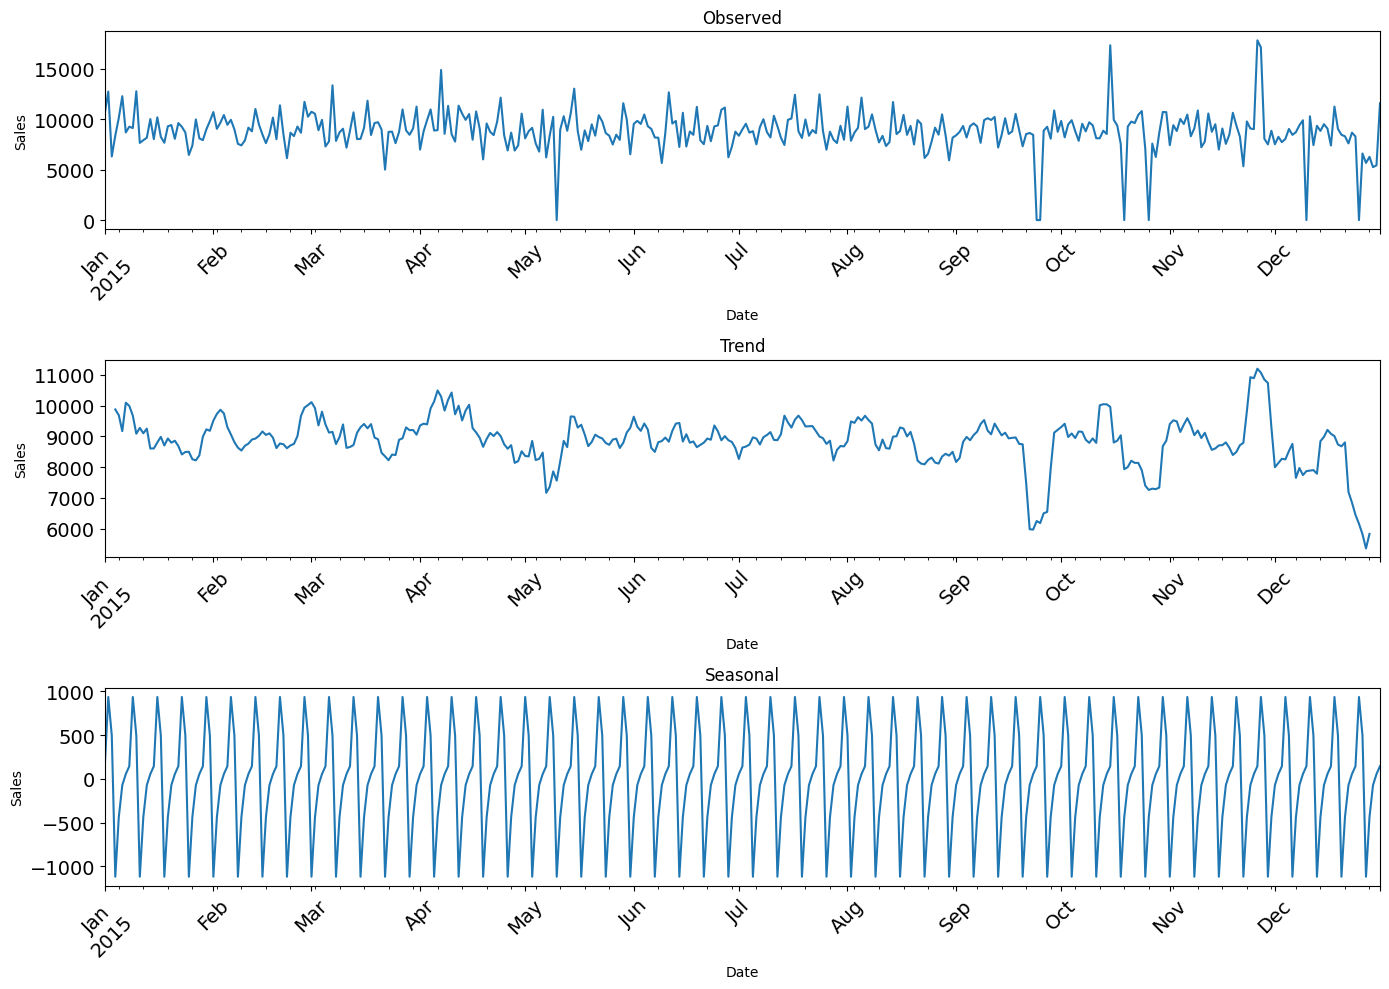

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Prepare daily sales data
daily_sales = Dominos_pizza.groupby(Dominos_pizza['order_date'].dt.date)['total_price'].sum()
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales = daily_sales.resample('D').sum().fillna(0).asfreq('D')

# Apply seasonal decomposition
result = seasonal_decompose(daily_sales, model='additive')

# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(14, 10))
titles = ['Observed', 'Trend', 'Seasonal']
for i, component in enumerate([result.observed, result.trend, result.seasonal]):
    component.plot(ax=axes[i], title=titles[i], xlabel='Date', ylabel='Sales', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [62]:
import pandas as pd

# Convert order_time to datetime if it's not already
Dominos_pizza['order_time'] = pd.to_datetime(Dominos_pizza['order_time'], errors='coerce')

# Create a new column 'AM_PM' based on the hour of the order_time
Dominos_pizza['AM_PM'] = Dominos_pizza['order_time'].dt.strftime('%p')

# Count sales based on AM and PM
sales_count_am_pm = Dominos_pizza.groupby('AM_PM').size()

print(sales_count_am_pm)


C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\2398465182.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Dominos_pizza['order_time'] = pd.to_datetime(Dominos_pizza['order_time'], errors='coerce')


AM_PM
AM     10324
PM    177047
dtype: int64


C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\2398465182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['order_time'] = pd.to_datetime(Dominos_pizza['order_time'], errors='coerce')
C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\2398465182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['AM_PM'] = Dominos_pizza['order_time'].dt.strftime('%p')


In [63]:
Dominos_pizza

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,holiday,working_day,day_of_week,month,week,year,AM_PM
0,1,1,hawaiian_m,1,2015-01-01,2024-11-09 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,40,1,0,3,1,1,2015,AM
1,1,1,hawaiian_m,1,2015-01-01,2024-11-09 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,30,1,0,3,1,1,2015,AM
2,1,1,hawaiian_m,1,2015-01-01,2024-11-09 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,20,1,0,3,1,1,2015,AM
3,2,2,classic_dlx_m,1,2015-01-01,2024-11-09 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,40,1,0,3,1,1,2015,AM
6,2,2,classic_dlx_m,1,2015-01-01,2024-11-09 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,10,1,0,3,1,1,2015,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267565,48619,21349,mexicana_l,1,2015-12-31,2024-11-09 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,60,0,0,3,12,53,2015,PM
267567,48619,21349,mexicana_l,1,2015-12-31,2024-11-09 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,100,0,0,3,12,53,2015,PM
267570,48620,21350,bbq_ckn_s,1,2015-12-31,2024-11-09 23:02:05,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,20,0,0,3,12,53,2015,PM
267571,48620,21350,bbq_ckn_s,1,2015-12-31,2024-11-09 23:02:05,12.75,12.75,S,Chicken,"Barbecue Chicken, Red Peppers, Green Peppers, ...",The Barbecue Chicken Pizza,5,0,0,3,12,53,2015,PM


In [64]:
# Save the cleaned data to a new CSV file
Dominos_pizza.to_csv('Dominos_pizza_data.csv', index=False)

## **2.2 Exploratory Data Analysis (EDA) - Data Visualization**

**Analyzing Sales Trends Over Time**

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\4176626255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['total_price'] = pd.to_numeric(Dominos_pizza['total_price'], errors='coerce')
C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\4176626255.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = Dominos_pizza.resample('M', on='order_date')['total_price'].sum()


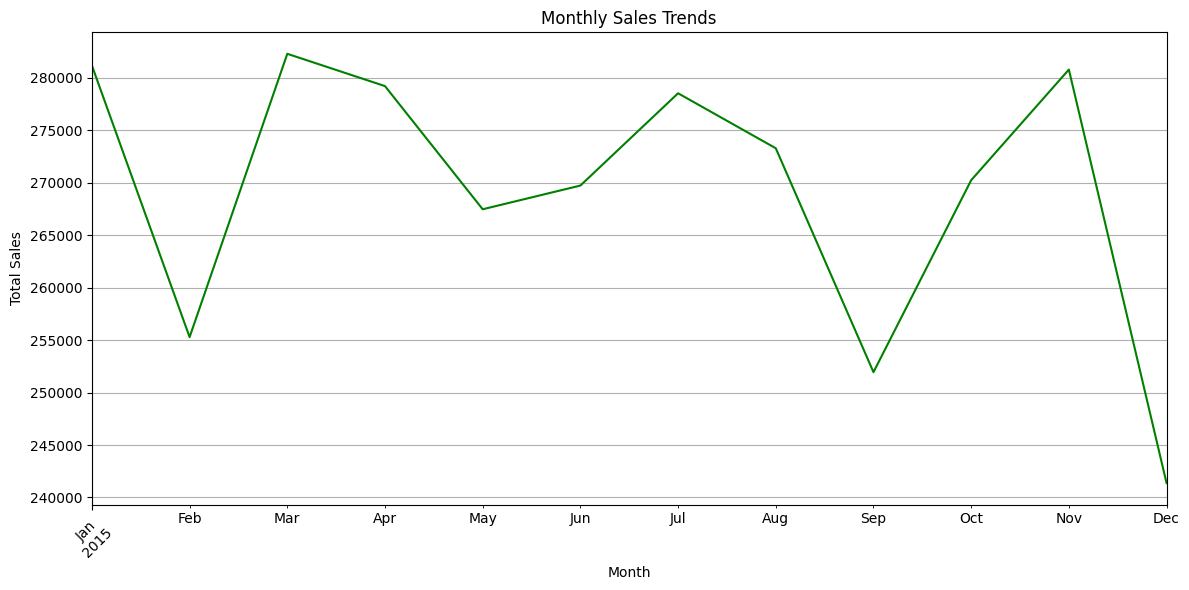

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Trends
Dominos_pizza['total_price'] = pd.to_numeric(Dominos_pizza['total_price'], errors='coerce')

monthly_sales = Dominos_pizza.resample('M', on='order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='g')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

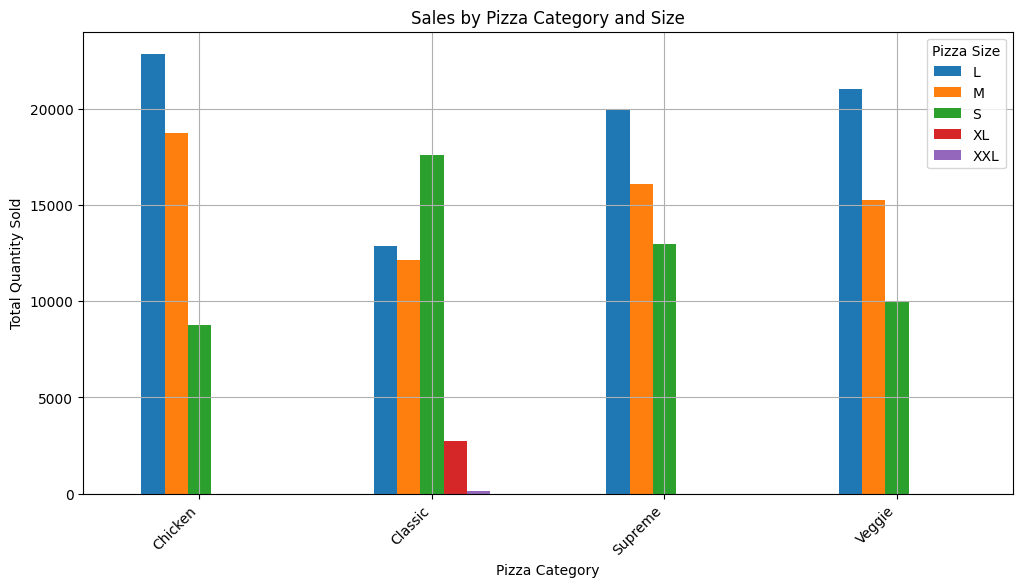

In [66]:
category_size_sales = Dominos_pizza.groupby(['pizza_category', 'pizza_size'])['quantity'].sum().unstack()
category_size_sales.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Sales by Pizza Category and Size')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Pizza Size')
plt.show()

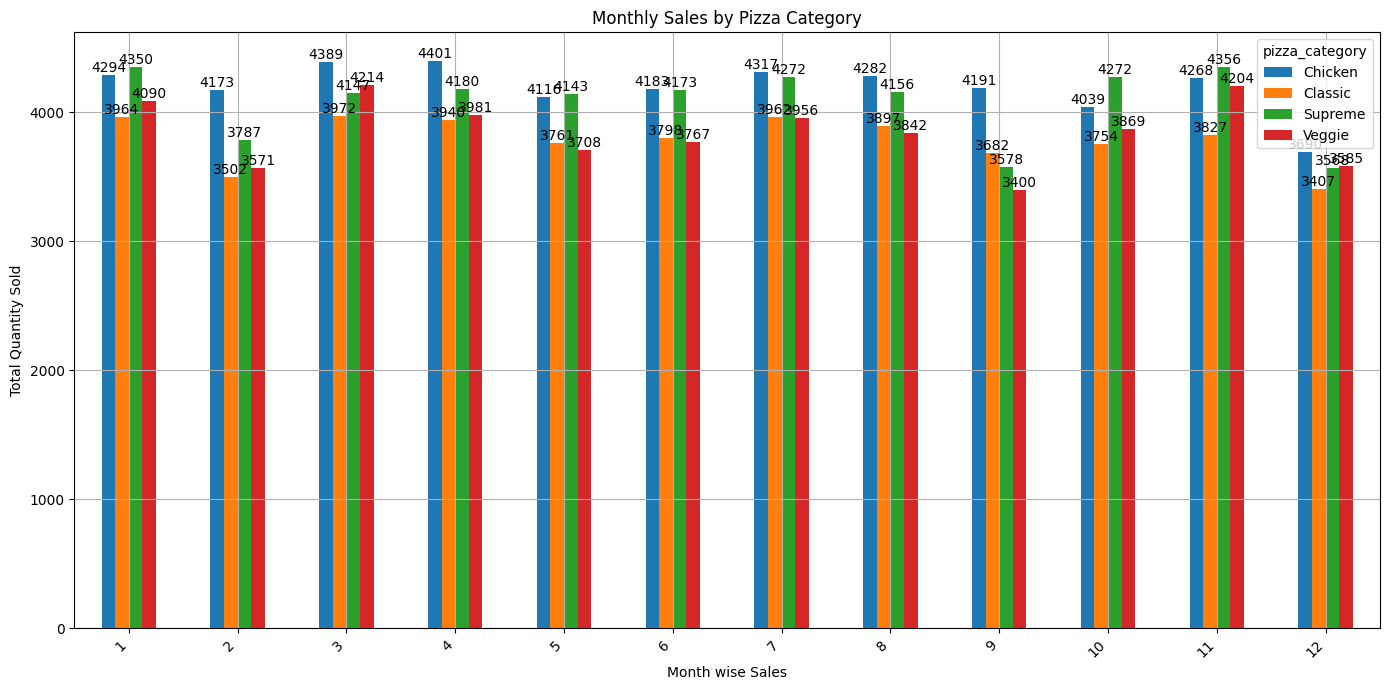

In [67]:
# Group by month, and pizza_category and calculate the sum of quantity
category_size_sales_monthly = Dominos_pizza.groupby(['month', 'pizza_category'])['quantity'].sum().unstack()

# Plotting
ax = category_size_sales_monthly.plot(kind='bar', figsize=(14, 7))
plt.title('Monthly Sales by Pizza Category')
plt.xlabel('Month wise Sales')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend(title='pizza_category')

# Adding the count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Monthly Sales Trends
# Dominos_pizza['total_price'] = pd.to_numeric(Dominos_pizza['total_price'], errors='coerce')

# monthly_sales = Dominos_pizza.resample('M', on='order_date')['total_price'].sum()

# plt.figure(figsize=(12, 6))
# monthly_sales.plot(color='g')


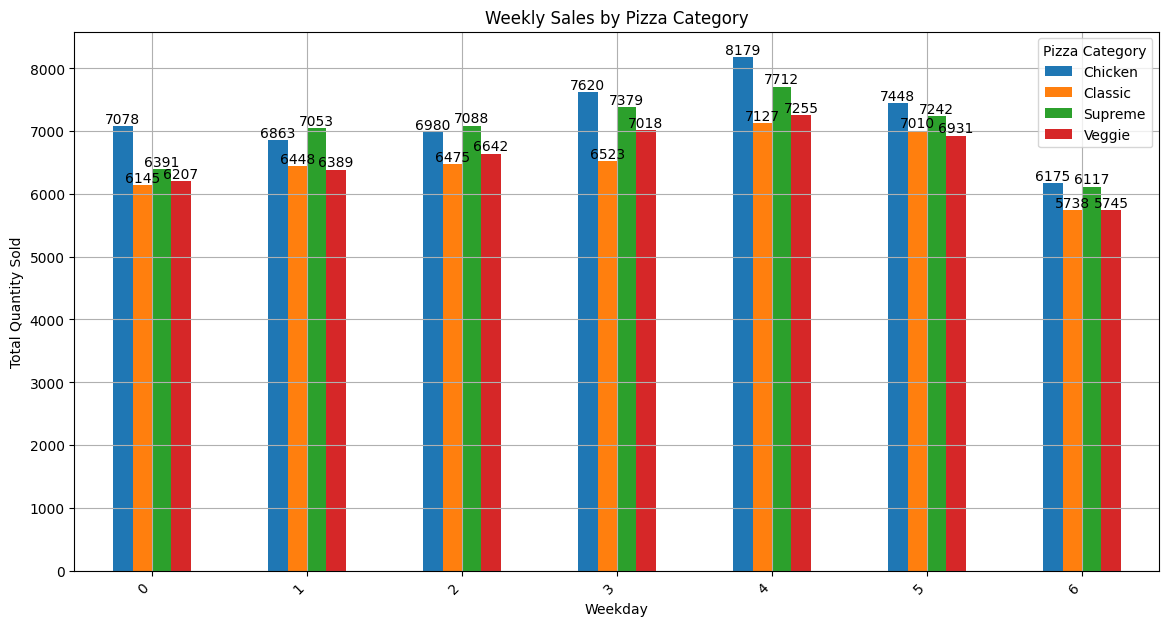

In [68]:
weekly_sales = Dominos_pizza.groupby(['day_of_week', 'pizza_category'])['quantity'].sum().unstack()

# Plotting
ax = weekly_sales.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Weekday')
plt.ylabel('Total Quantity Sold')
plt.title('Weekly Sales by Pizza Category')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Pizza Category')

# Adding the count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

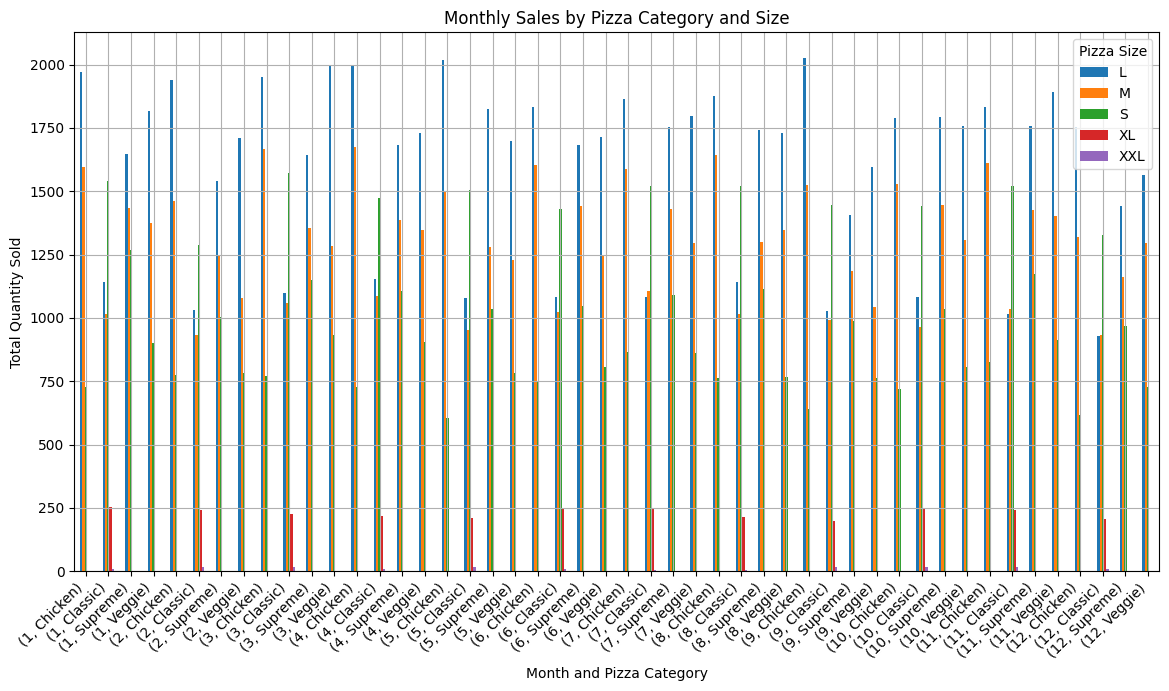

In [69]:
# Group by month, pizza_category, and pizza_size and calculate the sum of quantity
category_size_sales_monthly = Dominos_pizza.groupby(['month', 'pizza_category', 'pizza_size'])['quantity'].sum().unstack()

# Plotting
category_size_sales_monthly.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Month and Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Monthly Sales by Pizza Category and Size')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Pizza Size')
plt.show()

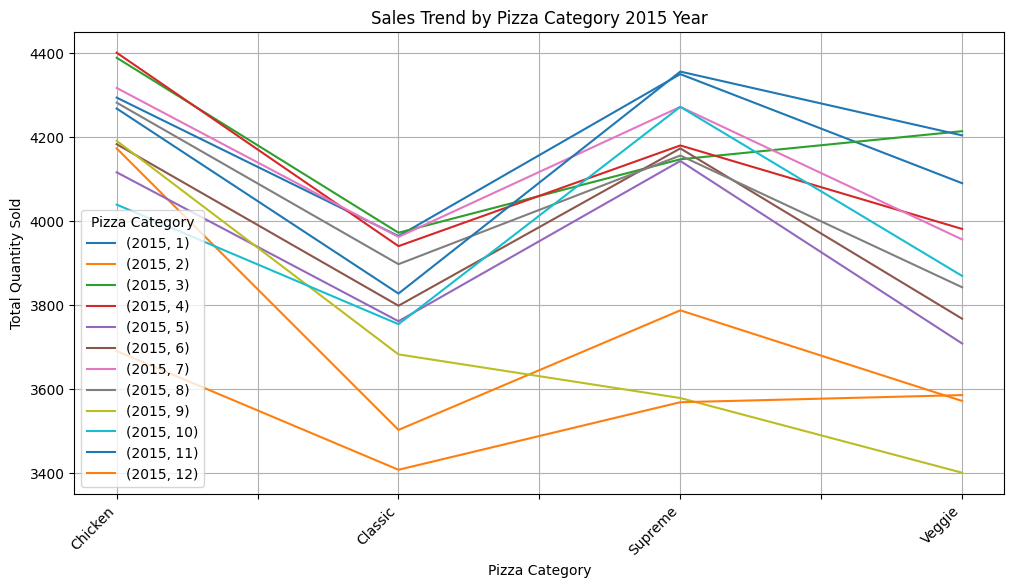

In [70]:
# Assuming 'year' and 'month' are already integer columns in 'pizza_df' and sales trends by pizza category over time
category_time_sales = Dominos_pizza.groupby(['pizza_category', 'year', 'month'])['quantity'].sum().unstack(['year', 'month'])
category_time_sales.plot(kind='line', figsize=(12, 6))
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Trend by Pizza Category 2015 Year')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Pizza Category')
plt.show()

Top-Selling Pizzas

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\3192066182.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pizza_sales.head(10), x='quantity', y='pizza_name', palette='viridis')


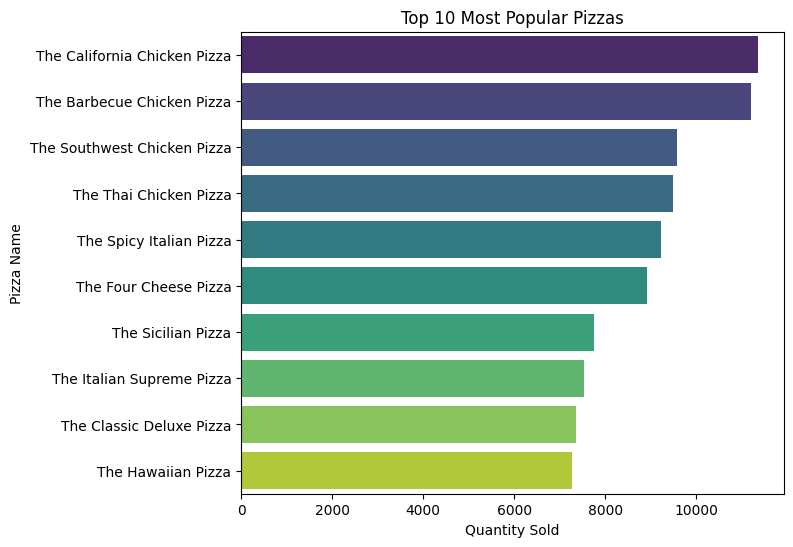

In [71]:
# Aggregate sales by pizza name
pizza_sales = Dominos_pizza.groupby('pizza_name')['quantity'].sum().reset_index()

# Sorting by quantity sold
pizza_sales = pizza_sales.sort_values(by='quantity', ascending=False)

# Ploting top 10 most popular pizzas
plt.figure(figsize=(7,6))
sns.barplot(data=pizza_sales.head(10), x='quantity', y='pizza_name', palette='viridis')
plt.title('Top 10 Most Popular Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

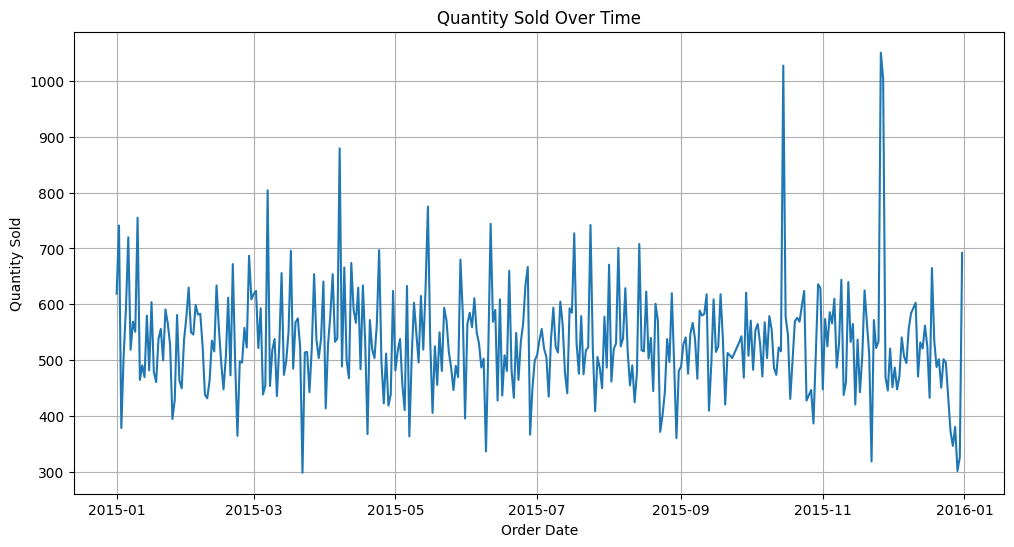

In [72]:
# Group by order date and sum the quantity
quantity_over_time = Dominos_pizza.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\1641413090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['Hour'] = pd.to_datetime(Dominos_pizza['order_time']).dt.hour


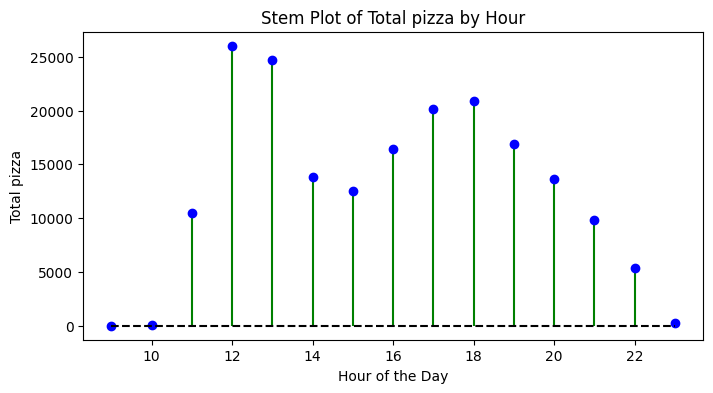

In [73]:
# Extract the hour from 'order_time'
Dominos_pizza['Hour'] = pd.to_datetime(Dominos_pizza['order_time']).dt.hour


hourly_count_df = Dominos_pizza.groupby('Hour', as_index=False).agg({'quantity': 'sum'})

# Plot Dot Plot
plt.figure(figsize=(8, 4))
plt.stem(hourly_count_df['Hour'],  hourly_count_df['quantity'], linefmt='-g', markerfmt = 'ob' ,basefmt="--k")
plt.title('Stem Plot of Total pizza by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total pizza')
plt.show()

C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\2755571092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_count_am_pm, x='AM_PM', y='sales_count', palette='viridis')


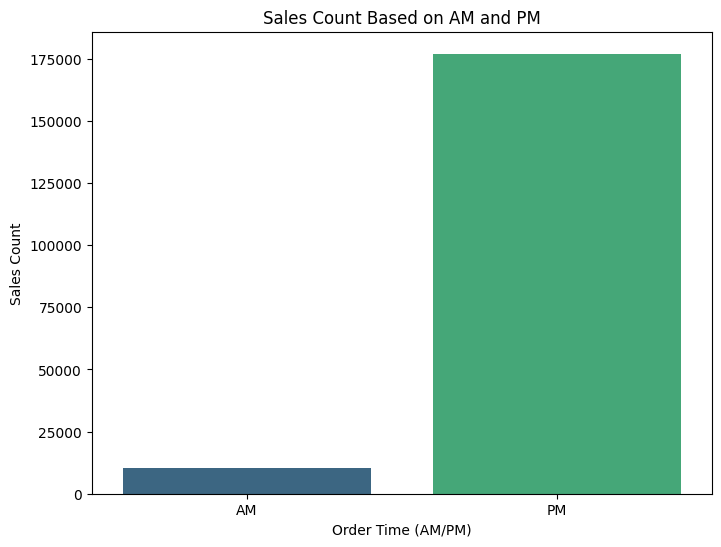

In [74]:
# Count sales based on AM and PM
sales_count_am_pm = Dominos_pizza.groupby('AM_PM').size().reset_index(name='sales_count')

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_count_am_pm, x='AM_PM', y='sales_count', palette='viridis')

plt.xlabel('Order Time (AM/PM)')
plt.ylabel('Sales Count')
plt.title('Sales Count Based on AM and PM')
plt.show()


C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\3821890724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['order_time'] = pd.to_datetime(Dominos_pizza['order_time'], errors='coerce')
C:\Users\aravi\AppData\Local\Temp\ipykernel_28740\3821890724.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dominos_pizza['AM_PM'] = Dominos_pizza['order_time'].dt.strftime('%p')


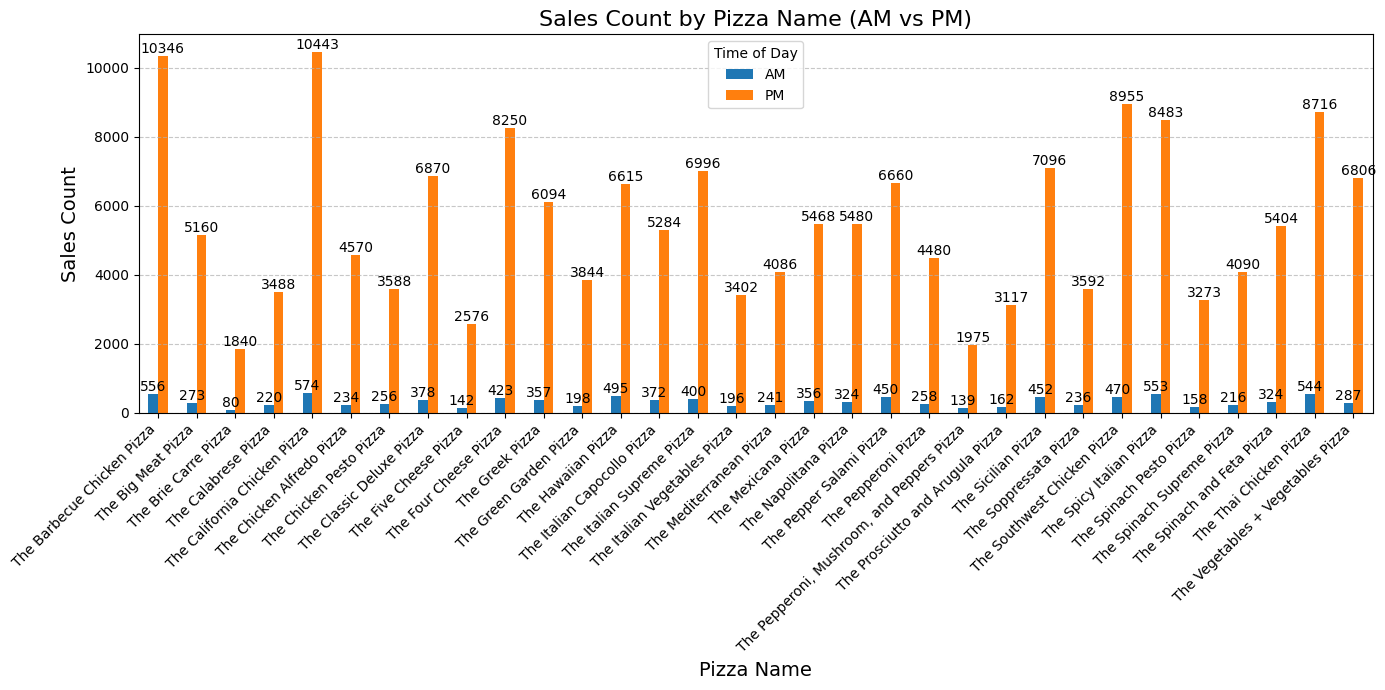

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert order_time to datetime if needed and create AM_PM column
Dominos_pizza['order_time'] = pd.to_datetime(Dominos_pizza['order_time'], errors='coerce')
Dominos_pizza['AM_PM'] = Dominos_pizza['order_time'].dt.strftime('%p')

# Group by pizza_name and AM_PM, then count the occurrences
sales_count_by_pizza_am_pm = Dominos_pizza.groupby(['pizza_name', 'AM_PM']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
sales_count_by_pizza_am_pm.plot(kind='bar', stacked=False, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Adding count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Chart styling
plt.title('Sales Count by Pizza Name (AM vs PM)', fontsize=16)
plt.xlabel('Pizza Name', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time of Day', labels=['AM', 'PM'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# **3 Model Selection**

## **3.1 Model Selected Prophet, Training, Evaluation**

In [76]:
# Step 1: Import necessary libraries and suppress warnings

from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 2: Load the data

# Load the data from CSV file
Dominos = pd.read_csv("Dominos_pizza_data.csv")

# Step 3: Prepare weekly aggregated sales data

# Data Preparation - Aggregate pizza sales by week and pizza type
def prepare_weekly_sales(df):
    # Ensure 'order_date' column exists and convert to datetime
    if 'order_date' not in df.columns:
        raise ValueError("The 'order_date' column is missing in the dataset.")
    if 'pizza_name_id' not in df.columns:
        raise ValueError("The 'pizza_name_id' column is missing in the dataset.")
    
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    
    # Aggregate weekly sales by pizza type
    weekly_sales = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)  # Prophet format
    return weekly_sales

# Step 4: Apply the function to prepare weekly sales data
# Call the function with the correct DataFrame
pizza_sales_weekly = prepare_weekly_sales(Dominos)

d:\I-P\Data_Science\Guvi\Project\Dominos_Pizza\Dominos_Predictive_Purchase_Order_System\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [77]:
# Step 5: Define a function to train models for each pizza type

from sklearn.metrics import mean_absolute_percentage_error as mape

def train_models_for_all_pizzas(pizza_sales_weekly):
    pizza_models = {}
    pizza_forecasts = {}
    pizza_mape_scores = []

    for pizza_id in pizza_sales_weekly['pizza_name_id'].unique():
        # Filter the sales data for this specific pizza
        pizza_data = pizza_sales_weekly[pizza_sales_weekly['pizza_name_id'] == pizza_id]

        # Split the data into training and testing sets
        train_size = int(0.8 * len(pizza_data))
        train, test = pizza_data[:train_size], pizza_data[train_size:]

        # Train Prophet model
        model = Prophet()
        model.fit(train)

        # Make predictions for the test period
        future = model.make_future_dataframe(periods=len(test), freq='W')
        forecast = model.predict(future)

        # Extract predicted values for test period
        predictions = forecast['yhat'][-len(test):].values

        # Calculate MAPE score for model performance
        prophet_mape = mape(test['y'], predictions)
        pizza_mape_scores.append({'pizza_name_id': pizza_id, 'mape': prophet_mape})
        pizza_models[pizza_id] = model  # Save model for later use

        # Save forecasted values
        pizza_forecasts[pizza_id] = forecast[['ds', 'yhat']].tail(len(test)).reset_index(drop=True)

    # Combine all forecasts into a single DataFrame
    all_forecasts = pd.concat([pd.DataFrame({'pizza_name_id': pizza_id, 'ds': pizza_forecasts[pizza_id]['ds'], 'yhat': pizza_forecasts[pizza_id]['yhat']}) 
                                for pizza_id in pizza_forecasts], ignore_index=True)
    
    return pizza_models, pizza_mape_scores, all_forecasts


In [78]:
# Step 6: Train the models

# Train the models and get MAPE scores along with all_forecasts
pizza_models, pizza_mape_scores, all_forecasts = train_models_for_all_pizzas(pizza_sales_weekly)

00:53:07 - cmdstanpy - INFO - Chain [1] start processing
00:53:07 - cmdstanpy - INFO - Chain [1] done processing
00:53:07 - cmdstanpy - INFO - Chain [1] start processing
00:53:07 - cmdstanpy - INFO - Chain [1] done processing
00:53:07 - cmdstanpy - INFO - Chain [1] start processing
00:53:07 - cmdstanpy - INFO - Chain [1] done processing
00:53:08 - cmdstanpy - INFO - Chain [1] start processing
00:53:08 - cmdstanpy - INFO - Chain [1] done processing
00:53:08 - cmdstanpy - INFO - Chain [1] start processing
00:53:08 - cmdstanpy - INFO - Chain [1] done processing
00:53:08 - cmdstanpy - INFO - Chain [1] start processing
00:53:08 - cmdstanpy - INFO - Chain [1] done processing
00:53:08 - cmdstanpy - INFO - Chain [1] start processing
00:53:08 - cmdstanpy - INFO - Chain [1] done processing
00:53:08 - cmdstanpy - INFO - Chain [1] start processing
00:53:08 - cmdstanpy - INFO - Chain [1] done processing
00:53:08 - cmdstanpy - INFO - Chain [1] start processing
00:53:09 - cmdstanpy - INFO - Chain [1]

In [79]:
# Step 7: Save trained models to a pickle file

import pickle

# Save the trained models to a pickle file
with open('trained_dominos_pizza_models.pkl', 'wb') as f:
    pickle.dump(pizza_models, f)
print("Trained pizza models saved to trained_dominos_pizza_models.pkl")

# Step 8: Print the MAPE score for each pizza

for item in pizza_mape_scores: # Print MAPE for each pizza type
    print(f'Pizza {item["pizza_name_id"]}: MAPE = {item["mape"]:.2f}')
	
# Step 9: Save MAPE scores to a CSV file

# Convert the list of MAPE scores to a DataFrame
pizza_mape_df = pd.DataFrame(pizza_mape_scores)

# Save the DataFrame to a CSV file
pizza_mape_df.to_csv('pizza_mape_scores.csv', index=False)
print("Model performance metrics saved to pizza_mape_scores.csv")

Trained pizza models saved to trained_dominos_pizza_models.pkl
Pizza bbq_ckn_l: MAPE = 0.36
Pizza bbq_ckn_m: MAPE = 0.52
Pizza bbq_ckn_s: MAPE = 0.32
Pizza big_meat_s: MAPE = 0.29
Pizza brie_carre_s: MAPE = 0.40
Pizza calabrese_l: MAPE = 0.41
Pizza calabrese_m: MAPE = 0.55
Pizza cali_ckn_l: MAPE = 0.47
Pizza cali_ckn_m: MAPE = 0.23
Pizza cali_ckn_s: MAPE = 0.47
Pizza ckn_alfredo_l: MAPE = 0.73
Pizza ckn_alfredo_m: MAPE = 0.30
Pizza ckn_alfredo_s: MAPE = 0.64
Pizza ckn_pesto_l: MAPE = 0.85
Pizza ckn_pesto_m: MAPE = 0.47
Pizza ckn_pesto_s: MAPE = 0.49
Pizza classic_dlx_l: MAPE = 0.19
Pizza classic_dlx_m: MAPE = 0.20
Pizza classic_dlx_s: MAPE = 0.35
Pizza five_cheese_l: MAPE = 0.29
Pizza four_cheese_l: MAPE = 0.28
Pizza four_cheese_m: MAPE = 0.52
Pizza green_garden_l: MAPE = 0.55
Pizza green_garden_m: MAPE = 0.57
Pizza green_garden_s: MAPE = 0.40
Pizza hawaiian_l: MAPE = 0.32
Pizza hawaiian_m: MAPE = 0.70
Pizza hawaiian_s: MAPE = 0.28
Pizza ital_cpcllo_l: MAPE = 0.77
Pizza ital_cpcllo_m: 

## **3.2 Ingredient Calculation for each pizza and Purchase Order Creation**

In [ ]:
ingredient_per_pizza_df = pd.read_csv("Dominos_pizza_data.csv")

# Merge forecasted sales with ingredient requirements
ingredient_demand = pd.merge(
    all_forecasts,  # this is the DataFrame containing forecasted sales for each pizza
    ingredient_per_pizza_df, 
    on='pizza_name_id', 
    how='inner'
)

# Calculate the total ingredient requirement based on predicted pizza sales
ingredient_demand['total_ingredient_quantity'] = (
    ingredient_demand['yhat'] * ingredient_demand['quantity']
)

# Display the updated DataFrame with total ingredient quantities
ingredient_demand.head()

,pizza_name_id,ds,yhat,pizza_id,order_id,quantity,order_date,order_time,unit_price,total_price,...,pizza_name,Items_Qty_In_Grams,holiday,working_day,day_of_week,month,week,year,AM_PM,total_ingredient_quantity
0,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,2024-11-09 13:02:59,20.75,20.75,...,The Barbecue Chicken Pizza,40,1,0,3,1,1,2015,PM,83.502439
1,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,2024-11-09 13:02:59,20.75,20.75,...,The Barbecue Chicken Pizza,15,1,0,3,1,1,2015,PM,83.502439
2,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,2024-11-09 13:02:59,20.75,20.75,...,The Barbecue Chicken Pizza,20,1,0,3,1,1,2015,PM,83.502439
3,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,2024-11-09 13:02:59,20.75,20.75,...,The Barbecue Chicken Pizza,30,1,0,3,1,1,2015,PM,83.502439
4,bbq_ckn_l,2015-10-18,83.502439,26,11,1,2015-01-01,2024-11-09 13:02:59,20.75,20.75,...,The Barbecue Chicken Pizza,60,1,0,3,1,1,2015,PM,83.502439


In [94]:
# Step 1: Aggregate ingredient demand across all pizzas
total_ingredient_demand = ingredient_demand.groupby('pizza_name_id')['total_ingredient_quantity'].sum().reset_index()

# Step 2: Sort ingredients by total required quantity and convert to kg
total_ingredient_demand = total_ingredient_demand.sort_values(by='total_ingredient_quantity', ascending=False)
total_ingredient_demand['total_ingredient_qty_kg'] = total_ingredient_demand['total_ingredient_quantity'] / 1000  # Convert to kg

# Step 3: Merge with ingredient_per_pizza_df to add the extra columns
purchase_order = pd.merge(
    total_ingredient_demand,
    ingredient_per_pizza_df[['pizza_name_id', 'pizza_ingredients', 'pizza_name', 'Items_Qty_In_Grams']].drop_duplicates(),
    on='pizza_name_id',
    how='left'
)

# Step 4: Rename columns for clarity
purchase_order = purchase_order.rename(
    columns={
        'pizza_name_id': 'Pizza Type', 
        'total_ingredient_qty_kg': 'Ingredient Qty (kg)'
    }
)

# Step 5: Group by 'Pizza Type' and aggregate ingredient quantities
purchase_order = purchase_order.groupby(['Pizza Type', 'pizza_name', 'pizza_ingredients'])[['Ingredient Qty (kg)']].sum().reset_index()

# Sort by 'Ingredient Qty (kg)' for the final purchase order display
purchase_order = purchase_order.sort_values(by='Ingredient Qty (kg)', ascending=False)

# Display the purchase order
print('Purchase Order:')
print('----------------')
purchase_order[['Pizza Type', 'pizza_name', 'pizza_ingredients', 'Ingredient Qty (kg)']]


Purchase Order:
----------------


,Pizza Type,pizza_name,pizza_ingredients,Ingredient Qty (kg)
21,four_cheese_l,The Four Cheese Pizza,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",46131.533890
68,spicy_ital_l,The Spicy Italian Pizza,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",37500.481786
65,southw_ckn_l,The Southwest Chicken Pizza,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",30099.800603
80,thai_ckn_l,The Thai Chicken Pizza,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",27650.544741
1,bbq_ckn_m,The Barbecue Chicken Pizza,"Barbecue Chicken, Red Peppers, Green Peppers, ...",25529.289039
...,...,...,...,...
23,green_garden_l,The Green Garden Pizza,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",235.753654
13,ckn_alfredo_s,The Chicken Alfredo Pizza,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",148.510246
7,calabrese_s,The Calabrese Pizza,"nduja Salami, Pancetta, Tomatoes, Red Onions, ...",138.079107
49,pep_msh_pep_s,"The Pepperoni, Mushroom, and Peppers Pizza","Pepperoni, Mushrooms, Green Peppers",71.631804


In [96]:
# Step 1: Import Necessary Libraries

# Import required libraries
import pandas as pd
import pickle
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error as mape
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 2: Load the Data
# Load the data from CSV file
Dominos = pd.read_csv("Dominos_pizza_data.csv")

# Step 3: Prepare Weekly Aggregated Sales Data

# Data Preparation - Aggregate pizza sales by week and pizza type
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    
    # Aggregate weekly sales by pizza type
    weekly_sales = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)  # Prophet format
    return weekly_sales

# Call the function with the loaded data
pizza_sales_weekly = prepare_weekly_sales(Dominos)

# Step 4: Train Models for Each Pizza Type

# Train models for each pizza type and calculate MAPE
def train_models_for_all_pizzas(pizza_sales_weekly):
    pizza_models = {}
    pizza_forecasts = {}
    pizza_mape_scores = []

    for pizza_id in pizza_sales_weekly['pizza_name_id'].unique():
        # Filter the sales data for this specific pizza
        pizza_data = pizza_sales_weekly[pizza_sales_weekly['pizza_name_id'] == pizza_id]

        # Split data into training and testing sets
        train_size = int(0.8 * len(pizza_data))
        train, test = pizza_data[:train_size], pizza_data[train_size:]

        # Train Prophet model
        model = Prophet()
        model.fit(train)

        # Make predictions for the test period
        future = model.make_future_dataframe(periods=len(test), freq='W')
        forecast = model.predict(future)

        # Save predictions and MAPE
        predictions = forecast['yhat'][-len(test):].values
        prophet_mape = mape(test['y'], predictions)
        pizza_mape_scores.append({'pizza_name_id': pizza_id, 'mape': prophet_mape})
        pizza_models[pizza_id] = model

        # Save forecasted values
        pizza_forecasts[pizza_id] = forecast[['ds', 'yhat']].tail(len(test)).reset_index(drop=True)

    # Combine all forecasts
    all_forecasts = pd.concat(
        [pd.DataFrame({'pizza_name_id': pizza_id, 'ds': pizza_forecasts[pizza_id]['ds'], 'yhat': pizza_forecasts[pizza_id]['yhat']}) 
         for pizza_id in pizza_forecasts], ignore_index=True
    )
    return pizza_models, pizza_mape_scores, all_forecasts

# Train the models and get MAPE scores
pizza_models, pizza_mape_scores, all_forecasts = train_models_for_all_pizzas(pizza_sales_weekly)

# Step 5: Save Trained Models and MAPE Scores

# Save trained models
with open('trained_dominos_pizza_models.pkl', 'wb') as f:
    pickle.dump(pizza_models, f)

# Save MAPE scores to CSV
pizza_mape_df = pd.DataFrame(pizza_mape_scores)
pizza_mape_df.to_csv('pizza_mape_scores.csv', index=False)
print("Trained models and MAPE scores saved.")

# Step 6: Load Ingredient Data

# Load ingredient data for each pizza
ingredient_per_pizza_df = pd.read_csv("Dominos_pizza_data.csv")

# Step 7: Merge Forecasted Sales with Ingredient Requirements

# Merge forecasted sales with ingredient requirements
ingredient_demand = pd.merge(
    all_forecasts,  # Forecasted sales data
    ingredient_per_pizza_df, 
    on='pizza_name_id', 
    how='inner'
)

# Verify the merged data
ingredient_demand.head()

# Step 8: Calculate Total Ingredient Quantities for Forecasted Sales

# Calculate the total ingredient requirement based on predicted pizza sales
ingredient_demand['total_ingredient_quantity'] = (
    ingredient_demand['yhat'] * ingredient_demand['quantity']
)

# Display the updated DataFrame
ingredient_demand.head()

# Step 9: Aggregate Ingredient Demand Across All Pizzas

# Aggregate ingredient demand across all pizzas
total_ingredient_demand = ingredient_demand.groupby('pizza_name_id')['total_ingredient_quantity'].sum().reset_index()

# Convert to kilograms
total_ingredient_demand['total_ingredient_qty_kg'] = total_ingredient_demand['total_ingredient_quantity'] / 1000
total_ingredient_demand = total_ingredient_demand[['pizza_name_id', 'total_ingredient_qty_kg']]

# Display aggregated ingredient demand
total_ingredient_demand.head()

# Step 10: Generate and Display the Purchase Order

# Format purchase order for each ingredient
purchase_order = total_ingredient_demand.rename(columns={'pizza_name_id': 'Pizza Type', 'total_ingredient_qty_kg': 'Ingredient Qty (kg)'})
purchase_order.sort_values(by='Ingredient Qty (kg)', ascending=False, inplace=True)

# Display the purchase order
purchase_order


01:54:19 - cmdstanpy - INFO - Chain [1] start processing
01:54:19 - cmdstanpy - INFO - Chain [1] done processing
01:54:19 - cmdstanpy - INFO - Chain [1] start processing
01:54:19 - cmdstanpy - INFO - Chain [1] done processing
01:54:19 - cmdstanpy - INFO - Chain [1] start processing
01:54:20 - cmdstanpy - INFO - Chain [1] done processing
01:54:20 - cmdstanpy - INFO - Chain [1] start processing
01:54:20 - cmdstanpy - INFO - Chain [1] done processing
01:54:20 - cmdstanpy - INFO - Chain [1] start processing
01:54:20 - cmdstanpy - INFO - Chain [1] done processing
01:54:20 - cmdstanpy - INFO - Chain [1] start processing
01:54:20 - cmdstanpy - INFO - Chain [1] done processing
01:54:20 - cmdstanpy - INFO - Chain [1] start processing
01:54:20 - cmdstanpy - INFO - Chain [1] done processing
01:54:20 - cmdstanpy - INFO - Chain [1] start processing
01:54:20 - cmdstanpy - INFO - Chain [1] done processing
01:54:21 - cmdstanpy - INFO - Chain [1] start processing
01:54:21 - cmdstanpy - INFO - Chain [1]

Trained models and MAPE scores saved.


,Pizza Type,Ingredient Qty (kg)
21,four_cheese_l,9226.306778
68,spicy_ital_l,7500.096357
3,big_meat_s,7368.498319
80,thai_ckn_l,6912.636185
65,southw_ckn_l,6019.960121
...,...,...
49,pep_msh_pep_s,71.631804
23,green_garden_l,47.150731
13,ckn_alfredo_s,37.127562
7,calabrese_s,34.519777
